In [1]:
import pandas as pd
import time
import datetime
from datetime import date
import pandas_datareader.data as web

symbols = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'USDT-USD', 'LINK-USD', 'BCH-USD', 'LTC-USD', 'ADA-USD', 'BNB-USD',
           'EOS-USD', 'XLM-USD', 'TRX-USD', 'XMR-USD', 'MIOTA-USD', 'NEO-USD', 'DASH-USD', 'ZEC-USD',
           'XEM-USD', 'DOGE-USD', 'DGB-USD', 'BAT-USD', 'KNC-USD', 'WAVES-USD', 'ZRX-USD', 'QTUM-USD', 'ICX-USD']

start = datetime.date(2017, 10, 27)

end = datetime.date.today()

data = {}
for i in symbols:
    try:
        data[i] = web.DataReader(i, 'yahoo', start, end)
        data[i].insert(0,'Symbol',i)
        print ('Done', i, data[i].index[0])
    except :
        print('No information for ticker: {}'.format(i))
        continue

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Done BTC-USD 2017-10-26 00:00:00
Done ETH-USD 2017-10-26 00:00:00
Done XRP-USD 2017-10-26 00:00:00
Done USDT-USD 2017-10-26 00:00:00
Done LINK-USD 2017-10-26 00:00:00
Done BCH-USD 2017-10-26 00:00:00
Done LTC-USD 2017-10-26 00:00:00
Done ADA-USD 2017-10-26 00:00:00
Done BNB-USD 2017-10-26 00:00:00
Done EOS-USD 2017-10-26 00:00:00
Done XLM-USD 2017-10-26 00:00:00
Done TRX-USD 2017-10-26 00:00:00
Done XMR-USD 2017-10-26 00:00:00
Done MIOTA-USD 2017-10-26 00:00:00
Done NEO-USD 2017-10-26 00:00:00
Done DASH-USD 2017-10-26 00:00:00
Done ZEC-USD 2017-10-26 00:00:00
Done XEM-USD 2017-10-26 00:00:00
Done DOGE-USD 2017-10-26 00:00:00
Done DGB-USD 2017-10-26 00:00:00
Done BAT-USD 2017-10-26 00:00:00
Done KNC-USD 2017-10-26 00:00:00
Done WAVES-USD 2017-10-26 00:00:00
Done ZRX-USD 2017-10-26 00:00:00
Done QTUM-USD 2017-10-26 00:00:00
Done ICX-USD 2017-10-26 00:00:00


In [2]:
for i in range(len(data)):
    data[symbols[i]]['High-Low'] = data[symbols[i]]['High'] - data[symbols[i]]['Low']
    data[symbols[i]]['HL-Perc'] = 100*data[symbols[i]]['High-Low']/data[symbols[i]]['Close']
    data[symbols[i]]['Open-PrevClose-Perc'] = (data[symbols[i]]['Open'] - data[symbols[i]]['Close'].shift(1))/(0.01*data[symbols[i]]['Close'].shift(1))

In [3]:
short_window=40
long_window=100

for i in range(len(data)):
    data[symbols[i]]['short_mavg'] = data[symbols[i]]['Adj Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    data[symbols[i]]['long_mavg'] = data[symbols[i]]['Adj Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    
    data[symbols[i]]['short > long'] = 0
    for j in range(len(data[symbols[i]])):
        if data[symbols[i]]['short_mavg'].iloc[j] > data[symbols[i]]['long_mavg'].iloc[j]:
            data[symbols[i]]['short > long'].iloc[j] = 1
    
    data[symbols[i]]['sl-diff'] = data[symbols[i]]['short > long'].diff()
    
    data[symbols[i]]['return'] = 100*(data[symbols[i]]['Adj Close'] - data[symbols[i]]['Adj Close'].shift(1))/data[symbols[i]]['Adj Close'].shift(1)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
for i in range(len(data)):
    data[symbols[i]]['up'] = 0
    for j in range(len(data[symbols[i]])):
        if data[symbols[i]]['Adj Close'].iloc[j] > data[symbols[i]]['Adj Close'].iloc[j-1]:
            data[symbols[i]]['up'].iloc[j] = 1
    data[symbols[i]]['up'] = data[symbols[i]]['up'].shift(-1)

In [5]:
for i in range(len(data)):    
    data[symbols[i]]['BollingerBand_Up_20_2'] = data[symbols[i]]['Adj Close'].rolling(20).mean() + 2*data[symbols[i]]['Adj Close'].rolling(20).std()
    data[symbols[i]]['BollingerBand_Down_20_2'] = data[symbols[i]]['Adj Close'].rolling(20).mean() - 2*data[symbols[i]]['Adj Close'].rolling(20).std()
    data[symbols[i]]['BollingerBand_Up_20_1'] = data[symbols[i]]['Adj Close'].rolling(20).mean() + data[symbols[i]]['Adj Close'].rolling(20).std()
    data[symbols[i]]['BollingerBand_Down_20_1'] = data[symbols[i]]['Adj Close'].rolling(20).mean() - data[symbols[i]]['Adj Close'].rolling(20).std()
    data[symbols[i]]['BollingerBand_Up_10_1'] = data[symbols[i]]['Adj Close'].rolling(10).mean() + data[symbols[i]]['Adj Close'].rolling(10).std()
    data[symbols[i]]['BollingerBand_Down_10_1'] = data[symbols[i]]['Adj Close'].rolling(10).mean() - data[symbols[i]]['Adj Close'].rolling(10).std()
    data[symbols[i]]['BollingerBand_Up_10_2'] = data[symbols[i]]['Adj Close'].rolling(10).mean() + 2*data[symbols[i]]['Adj Close'].rolling(10).std()
    data[symbols[i]]['BollingerBand_Down_10_2'] = data[symbols[i]]['Adj Close'].rolling(10).mean() - 2*data[symbols[i]]['Adj Close'].rolling(10).std()

In [6]:
for i in range(len(data)):
    data[symbols[i]] = data[symbols[i]].dropna()
    data[symbols[i]] = data[symbols[i]][data[symbols[i]].index > '2017-11-15 00:00:00']

In [7]:
df = pd.DataFrame()
for i in range(len(data)):
    df = df.append(data[symbols[i]])
df

,Symbol,High,Low,Open,Close,Volume,Adj Close,High-Low,HL-Perc,Open-PrevClose-Perc,...,return,up,BollingerBand_Up_20_2,BollingerBand_Down_20_2,BollingerBand_Up_20_1,BollingerBand_Down_20_1,BollingerBand_Up_10_1,BollingerBand_Down_10_1,BollingerBand_Up_10_2,BollingerBand_Down_10_2
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-16,BTC-USD,7967.379883,7176.580078,7323.240234,7871.689941,5.123810e+09,7871.689941,790.799805,10.046125,0.105258,...,7.602308,0.0,7962.333007,5680.215968,7391.803747,6250.745228,7483.965504,6327.220531,8062.337991,5748.848045
2017-11-17,BTC-USD,8004.589844,7561.089844,7853.569824,7708.990234,4.651670e+09,7708.990234,443.500000,5.753023,-0.230193,...,-2.066897,1.0,8008.764064,5829.374949,7463.916786,6374.222228,7591.620220,6332.487885,8221.186388,5702.921718
2017-11-18,BTC-USD,7884.990234,7463.439941,7697.209961,7790.149902,3.667190e+09,7790.149902,421.550293,5.411325,-0.152812,...,1.052792,1.0,8094.373269,5907.395725,7547.628883,6454.140111,7661.296793,6328.903305,8327.493537,5662.706561
2017-11-19,BTC-USD,8101.910156,7694.100098,7766.029785,8036.490234,3.149320e+09,8036.490234,407.810059,5.074480,-0.309623,...,3.162203,1.0,8202.431440,5989.933599,7649.306980,6543.058059,7828.036833,6340.745296,8571.682601,5597.099528
2017-11-20,BTC-USD,8336.860352,7949.359863,8039.069824,8200.639648,3.488450e+09,8200.639648,387.500488,4.725247,0.032098,...,2.042551,0.0,8351.569710,6014.019303,7767.182109,6598.406905,8042.312598,6442.969433,8841.984181,5643.297850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-08,ICX-USD,0.432505,0.393317,0.395732,0.425887,3.519578e+07,0.425887,0.039188,9.201532,0.042545,...,7.665731,1.0,0.421395,0.357630,0.405454,0.373571,0.402080,0.369069,0.418585,0.352564
2020-08-09,ICX-USD,0.467818,0.410997,0.426249,0.454775,4.102321e+07,0.454775,0.056821,12.494334,0.085008,...,6.783080,0.0,0.435261,0.349131,0.413728,0.370664,0.420459,0.367268,0.447055,0.340673
2020-08-10,ICX-USD,0.455326,0.412478,0.454731,0.423658,5.523601e+07,0.423658,0.042848,10.113814,-0.009627,...,-6.842155,1.0,0.437593,0.348209,0.415247,0.370555,0.425935,0.371752,0.453026,0.344660


In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['Symbol'] = labelencoder.fit_transform(df['Symbol'])

In [9]:
pd.set_option('display.max_columns', None)

df

,Symbol,High,Low,Open,Close,Volume,Adj Close,High-Low,HL-Perc,Open-PrevClose-Perc,short_mavg,long_mavg,short > long,sl-diff,return,up,BollingerBand_Up_20_2,BollingerBand_Down_20_2,BollingerBand_Up_20_1,BollingerBand_Down_20_1,BollingerBand_Up_10_1,BollingerBand_Down_10_1,BollingerBand_Up_10_2,BollingerBand_Down_10_2
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-16,4,7967.379883,7176.580078,7323.240234,7871.689941,5.123810e+09,7871.689941,790.799805,10.046125,0.105258,6771.732840,6771.732840,0,0.0,7.602308,0.0,7962.333007,5680.215968,7391.803747,6250.745228,7483.965504,6327.220531,8062.337991,5748.848045
2017-11-17,4,8004.589844,7561.089844,7853.569824,7708.990234,4.651670e+09,7708.990234,443.500000,5.753023,-0.230193,6814.335449,6814.335449,0,0.0,-2.066897,1.0,8008.764064,5829.374949,7463.916786,6374.222228,7591.620220,6332.487885,8221.186388,5702.921718
2017-11-18,4,7884.990234,7463.439941,7697.209961,7790.149902,3.667190e+09,7790.149902,421.550293,5.411325,-0.152812,6856.762165,6856.762165,0,0.0,1.052792,1.0,8094.373269,5907.395725,7547.628883,6454.140111,7661.296793,6328.903305,8327.493537,5662.706561
2017-11-19,4,8101.910156,7694.100098,7766.029785,8036.490234,3.149320e+09,8036.490234,407.810059,5.074480,-0.309623,6905.917501,6905.917501,0,0.0,3.162203,1.0,8202.431440,5989.933599,7649.306980,6543.058059,7828.036833,6340.745296,8571.682601,5597.099528
2017-11-20,4,8336.860352,7949.359863,8039.069824,8200.639648,3.488450e+09,8200.639648,387.500488,4.725247,0.032098,6957.706387,6957.706387,0,0.0,2.042551,0.0,8351.569710,6014.019303,7767.182109,6598.406905,8042.312598,6442.969433,8841.984181,5643.297850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-08,10,0.432505,0.393317,0.395732,0.425887,3.519578e+07,0.425887,0.039188,9.201532,0.042545,0.381276,0.338898,1,0.0,7.665731,1.0,0.421395,0.357630,0.405454,0.373571,0.402080,0.369069,0.418585,0.352564
2020-08-09,10,0.467818,0.410997,0.426249,0.454775,4.102321e+07,0.454775,0.056821,12.494334,0.085008,0.385406,0.340584,1,0.0,6.783080,0.0,0.435261,0.349131,0.413728,0.370664,0.420459,0.367268,0.447055,0.340673
2020-08-10,10,0.455326,0.412478,0.454731,0.423658,5.523601e+07,0.423658,0.042848,10.113814,-0.009627,0.388511,0.341918,1,0.0,-6.842155,1.0,0.437593,0.348209,0.415247,0.370555,0.425935,0.371752,0.453026,0.344660


In [10]:
from sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
def accuracy_for_threshold(thresh, real, predicted):
    total=0
    num=0
    for i in range(len(predicted)):
        if thresh < predicted[i] < (1-thresh):
            continue
        else:
            total += 1
            num += 1 - abs(round(predicted[i]) - real[i]) 
    return num/total

In [12]:
models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(probability=True)]

cutoff_date = '2020-7-1'

train = df[df.index < cutoff_date]
val = df[df.index >= cutoff_date]

X_train, X_test = train.drop(['up'], axis=1), val.drop(['up'], axis=1)
y_train, y_test = train['up'], val['up']

for mdl in models:
    mdl.fit(X_train, y_train)

    accuracy_train = accuracy_for_threshold(0.55, y_train, mdl.predict_proba(X_train)[:, 1])
    accuracy_test = accuracy_for_threshold(0.55, y_test, mdl.predict_proba(X_test)[:, 1])

    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100), mdl)
    print('Test Accuracy:{: .2f}%'.format(accuracy_test*100), mdl)


Train Accuracy: 100.00% RandomForestClassifier()
Test Accuracy: 55.82% RandomForestClassifier()

Train Accuracy: 100.00% DecisionTreeClassifier()
Test Accuracy: 51.43% DecisionTreeClassifier()

Train Accuracy: 48.87% LogisticRegression()
Test Accuracy: 56.36% LogisticRegression()

Train Accuracy: 51.13% SVC(probability=True)
Test Accuracy: 43.64% SVC(probability=True)


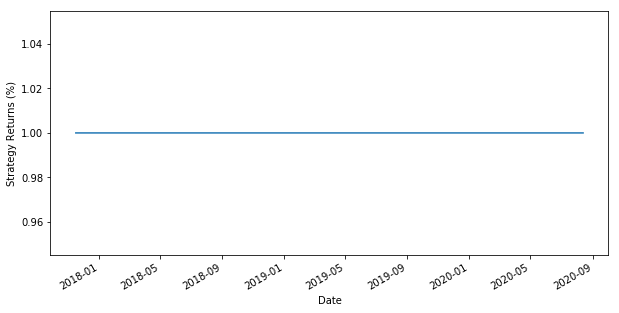

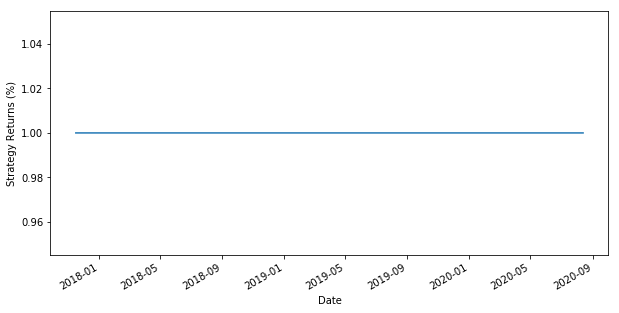

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

df2=pd.DataFrame()
df2['Return'] = (df['Adj Close'].shift(-1) - df['Adj Close'])/df['Adj Close']

for mdl in models:

    # Predicted Signal
    X = df.drop('up', axis=1)
    df2['Predicted_Signal'+str(mdl)] = mdl.predict(np.nan_to_num(X))

    # Calculate daily returns

    # Calculate strategy returns
    df2['Strategy_Return' +str(mdl)] = 1
    pred = mdl.predict_proba(X)[:, 1]
    for i in range(len(df)):
        if pred[i]:
            try:
                df2['Strategy_Return' +str(mdl)][i] = df2.Return[i].fillna(0) * df2['Predicted_Signal'+str(mdl)][i] + 1
            except:
                df2['Strategy_Return' +str(mdl)][i] = 1

    # Calculate geometric returns
    geometric_returns = (df2['Strategy_Return' +str(mdl)]).cumprod()

    # Plot geometric returns
    geometric_returns.plot(figsize=(10,5))
    plt.ylabel("Strategy Returns (%)")
    plt.xlabel("Date")
    plt.show()